## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow # needed for importing dataframes
import warnings

warnings.filterwarnings('ignore') # silence warnings

sel_zone = 'IT_NORD' # select the zone to produce the input for

# Extracting all datasets

### 2t dataset (temperature)

,node_id,2t,year,month,day,hour,day_of_week,2t_1d,2t_2d
date_time,,,,,,,,,
2022-01-01 00:00:00+00:00,IT_NORD,275.784985,2022,1,1,0,Saturday,0.000000,0.000000
2022-01-01 03:00:00+00:00,IT_NORD,275.289201,2022,1,1,3,Saturday,-0.495784,0.000000
2022-01-01 06:00:00+00:00,IT_NORD,274.958228,2022,1,1,6,Saturday,-0.330973,0.164812
2022-01-01 09:00:00+00:00,IT_NORD,277.285909,2022,1,1,9,Saturday,2.327682,2.658654
2022-01-01 12:00:00+00:00,IT_NORD,282.379178,2022,1,1,12,Saturday,5.093269,2.765587
...,...,...,...,...,...,...,...,...,...
2025-01-24 21:00:00+00:00,IT_NORD,277.711232,2025,1,24,21,Friday,-0.719897,2.077406
2025-01-25 00:00:00+00:00,IT_NORD,277.342298,2025,1,25,0,Saturday,-0.368935,0.350963
2025-01-25 03:00:00+00:00,IT_NORD,277.233915,2025,1,25,3,Saturday,-0.108383,0.260552


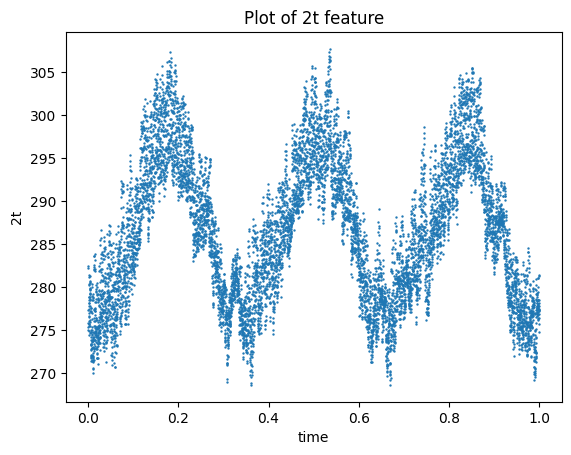

In [28]:
filename = "lcpb_files/2t_pop.zst"

df_2t = pd.read_parquet(filename)  # this reads .zst files efficiently

# extracting the time information
df_2t['year'] = pd.to_datetime(df_2t.index).year
df_2t['month'] = pd.to_datetime(df_2t.index).month
df_2t['day'] = pd.to_datetime(df_2t.index).day
df_2t['hour'] = pd.to_datetime(df_2t.index).hour
df_2t['day_of_week'] = pd.to_datetime(df_2t.index).day_name()

# keeping only the right zone
sel_2t = df_2t[df_2t['node_id'] == sel_zone]

# computing the first derivative
sel_2t['2t_1d'] = sel_2t.loc[:,'2t'].diff()
# computing the second derivative
sel_2t['2t_2d'] = sel_2t.loc[:,'2t_1d'].diff()

# set NA values to 0 (.diff() leaves out first values)
sel_2t.loc[sel_2t.index[0], '2t_1d'] = 0
sel_2t.loc[sel_2t.index[0], '2t_2d'] = 0
sel_2t.loc[sel_2t.index[1], '2t_2d'] = 0

# defining a growing time parameter (for easy plot purposes)
time = np.linspace(0, 1, len(sel_2t['year']))

# plot the data to check if there is a reasonable trend (no clear outliers)
#plt.scatter(time, sel_2t['2t'], s=0.5)
plt.scatter(time, sel_2t['2t'], s=.5)
plt.xlabel('time')
plt.ylabel('2t')
plt.title('Plot of 2t feature')

sel_2t


### tp dataset (precipitations)

,node_id,tp,year,month,day,hour,day_of_week
date_time,,,,,,,
2021-12-31 18:00:00+00:00,IT_NORD,1.715743e-06,2021,12,31,18,Friday
2022-01-01 06:00:00+00:00,IT_NORD,9.729075e-07,2022,1,1,6,Saturday
2022-01-01 18:00:00+00:00,IT_NORD,1.882854e-06,2022,1,1,18,Saturday
2022-01-02 06:00:00+00:00,IT_NORD,2.427733e-06,2022,1,2,6,Sunday
2022-01-02 18:00:00+00:00,IT_NORD,4.946913e-06,2022,1,2,18,Sunday
...,...,...,...,...,...,...,...
2024-12-29 18:00:00+00:00,IT_NORD,3.483742e-08,2024,12,29,18,Sunday
2024-12-30 06:00:00+00:00,IT_NORD,4.862723e-08,2024,12,30,6,Monday
2024-12-30 18:00:00+00:00,IT_NORD,2.293463e-07,2024,12,30,18,Monday


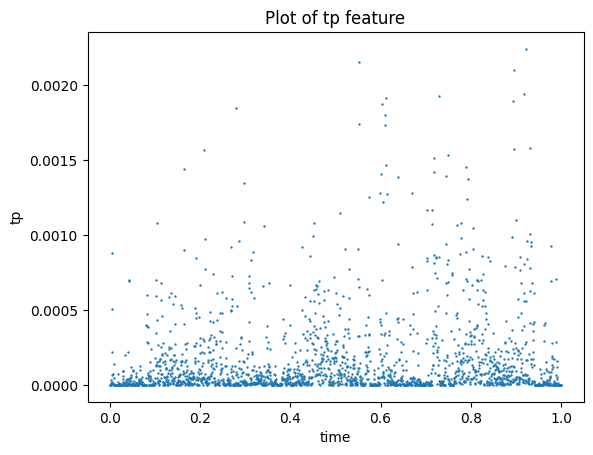

In [3]:
filename = "lcpb_files/tp_no_mask.zst"

df_tp = pd.read_parquet(filename) # this reads .zst files efficiently

# extracting the time information
df_tp['year'] = pd.to_datetime(df_tp.index).year
df_tp['month'] = pd.to_datetime(df_tp.index).month
df_tp['day'] = pd.to_datetime(df_tp.index).day
df_tp['hour'] = pd.to_datetime(df_tp.index).hour
df_tp['day_of_week'] = pd.to_datetime(df_tp.index).day_name()

# keeping only the right zone
sel_tp = df_tp[df_tp['node_id'] == sel_zone]

# defining a growing time parameter (for easy plot purposes)
time = np.linspace(0, 1, len(sel_tp['year']))

# plot the data to check if there is a reasonable trend (no clear outliers)
plt.scatter(time, sel_tp['tp'], s = 0.5)
plt.xlabel('time')
plt.ylabel('tp')
plt.title('Plot of tp feature')

sel_tp


### ssrd solar dataset

,node_id,ssrd,year,month,day,hour,day_of_week
date_time,,,,,,,
2021-12-31 18:00:00+00:00,IT_NORD,0.000000,2021,12,31,18,Friday
2022-01-01 06:00:00+00:00,IT_NORD,516877.928058,2022,1,1,6,Saturday
2022-01-01 18:00:00+00:00,IT_NORD,0.000000,2022,1,1,18,Saturday
2022-01-02 06:00:00+00:00,IT_NORD,445703.597122,2022,1,2,6,Sunday
2022-01-02 18:00:00+00:00,IT_NORD,0.000000,2022,1,2,18,Sunday
...,...,...,...,...,...,...,...
2025-01-23 06:00:00+00:00,IT_NORD,236703.424460,2025,1,23,6,Thursday
2025-01-23 18:00:00+00:00,IT_NORD,0.000000,2025,1,23,18,Thursday
2025-01-24 06:00:00+00:00,IT_NORD,585959.712230,2025,1,24,6,Friday


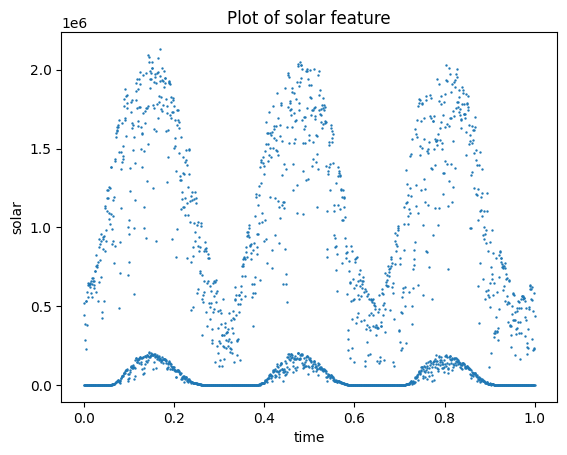

In [4]:
filename = "lcpb_files/ssrd_solar.zst"

df_solar = pd.read_parquet(filename) # this reads .zst files efficiently

# extracting the time information
df_solar['year'] = pd.to_datetime(df_solar.index).year
df_solar['month'] = pd.to_datetime(df_solar.index).month
df_solar['day'] = pd.to_datetime(df_solar.index).day
df_solar['hour'] = pd.to_datetime(df_solar.index).hour
df_solar['day_of_week'] = pd.to_datetime(df_solar.index).day_name()

# keeping only the right zone
sel_solar = df_solar[df_solar['node_id'] == sel_zone]

# defining a growing time parameter (for easy plot purposes)
time = np.linspace(0, 1, len(sel_solar['year']))

# plot the data to check if there is a reasonable trend (no clear outliers)
plt.scatter(time, sel_solar['ssrd'], s = 0.5)
plt.xlabel('time')
plt.ylabel('solar')
plt.title('Plot of solar feature')

sel_solar


### ws 10 m
this is the wind speed at 10 m from ground (m/s)

,node_id,ws_10m,year,month,day,hour,day_of_week,ws_10m_1d,ws_10m_2d
date_time,,,,,,,,,
2022-01-01 00:00:00+00:00,IT_NORD,1.866247,2022,1,1,0,Saturday,0.000000,0.000000
2022-01-01 03:00:00+00:00,IT_NORD,1.868403,2022,1,1,3,Saturday,0.002157,0.000000
2022-01-01 06:00:00+00:00,IT_NORD,1.829957,2022,1,1,6,Saturday,-0.038446,-0.038446
2022-01-01 09:00:00+00:00,IT_NORD,1.697000,2022,1,1,9,Saturday,-0.132957,-0.132957
2022-01-01 12:00:00+00:00,IT_NORD,1.456283,2022,1,1,12,Saturday,-0.240717,-0.240717
...,...,...,...,...,...,...,...,...,...
2025-01-25 03:00:00+00:00,IT_NORD,1.111475,2025,1,25,3,Saturday,-0.010441,-0.010441
2025-01-25 06:00:00+00:00,IT_NORD,1.071180,2025,1,25,6,Saturday,-0.040295,-0.040295
2025-01-25 09:00:00+00:00,IT_NORD,1.068923,2025,1,25,9,Saturday,-0.002258,-0.002258


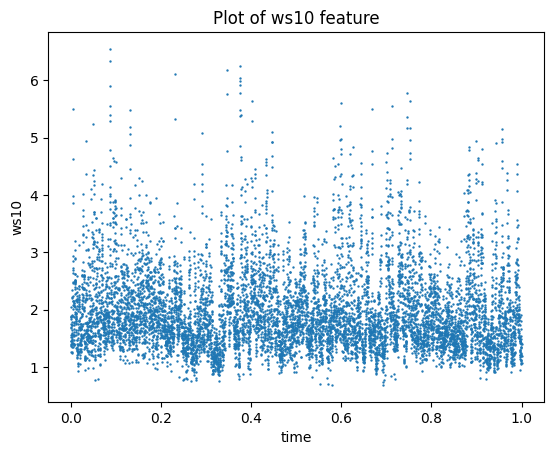

In [5]:
filename = "lcpb_files/ws_10m_wind.zst"

df_ws10 = pd.read_parquet(filename) # this reads .zst files efficiently

# extracting the time information
df_ws10['year'] = pd.to_datetime(df_ws10.index).year
df_ws10['month'] = pd.to_datetime(df_ws10.index).month
df_ws10['day'] = pd.to_datetime(df_ws10.index).day
df_ws10['hour'] = pd.to_datetime(df_ws10.index).hour
df_ws10['day_of_week'] = pd.to_datetime(df_ws10.index).day_name()

# keeping only the right zone
sel_ws10 = df_ws10[df_ws10['node_id'] == sel_zone]

# computing the first derivative
sel_ws10['ws_10m_1d'] = sel_ws10.loc[:,'ws_10m'].diff()
# computing the second derivative
sel_ws10['ws_10m_2d'] = sel_ws10.loc[:,'ws_10m'].diff()

# set NA values to 0 (.diff() leaves out first values)
sel_ws10.loc[sel_ws10.index[0], 'ws_10m_1d'] = 0
sel_ws10.loc[sel_ws10.index[0], 'ws_10m_2d'] = 0
sel_ws10.loc[sel_ws10.index[1], 'ws_10m_2d'] = 0

# defining a growing time parameter (for easy plot purposes)
time = np.linspace(0, 1, len(sel_ws10['year']))

# plot the data to check if there is a reasonable trend (no clear outliers)
plt.scatter(time, sel_ws10['ws_10m'], s = 0.5)
plt.xlabel('time')
plt.ylabel('ws10')
plt.title('Plot of ws10 feature')

sel_ws10


### ws 100 m
wind speed at 100 m from ground (m/s)

,node_id,ws_100m,year,month,day,hour,day_of_week,ws_100m_1d,ws_100m_2d
date_time,,,,,,,,,
2022-01-01 00:00:00+00:00,IT_NORD,2.788379,2022,1,1,0,Saturday,0.000000,0.000000
2022-01-01 03:00:00+00:00,IT_NORD,2.541100,2022,1,1,3,Saturday,-0.247278,0.000000
2022-01-01 06:00:00+00:00,IT_NORD,2.442400,2022,1,1,6,Saturday,-0.098701,-0.098701
2022-01-01 09:00:00+00:00,IT_NORD,1.985010,2022,1,1,9,Saturday,-0.457390,-0.457390
2022-01-01 12:00:00+00:00,IT_NORD,1.531676,2022,1,1,12,Saturday,-0.453334,-0.453334
...,...,...,...,...,...,...,...,...,...
2025-01-25 18:00:00+00:00,IT_NORD,1.949152,2025,1,25,18,Saturday,0.321449,0.321449
2025-01-25 21:00:00+00:00,IT_NORD,2.342194,2025,1,25,21,Saturday,0.393042,0.393042
2025-01-26 00:00:00+00:00,IT_NORD,2.423916,2025,1,26,0,Sunday,0.081722,0.081722


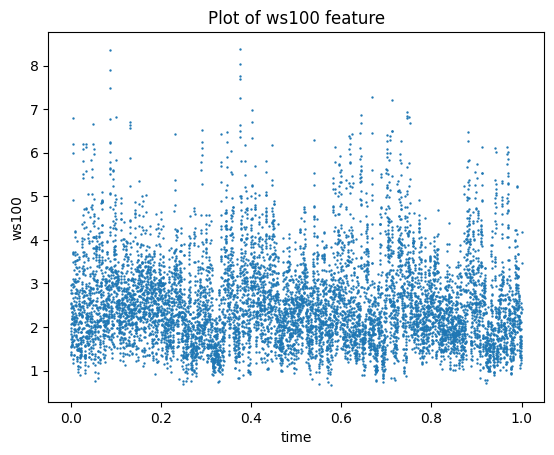

In [6]:
filename = "lcpb_files/ws_100m_wind.zst"

df_ws100 = pd.read_parquet(filename) # this reads .zst files efficiently

# extracting the time information
df_ws100['year'] = pd.to_datetime(df_ws100.index).year
df_ws100['month'] = pd.to_datetime(df_ws100.index).month
df_ws100['day'] = pd.to_datetime(df_ws100.index).day
df_ws100['hour'] = pd.to_datetime(df_ws100.index).hour
df_ws100['day_of_week'] = pd.to_datetime(df_ws100.index).day_name()

# keeping only the right zone
sel_ws100 = df_ws100[df_ws100['node_id'] == sel_zone]

# computing the first derivative
sel_ws100['ws_100m_1d'] = sel_ws100.loc[:,'ws_100m'].diff()
# computing the second derivative
sel_ws100['ws_100m_2d'] = sel_ws100.loc[:,'ws_100m'].diff()

# set NA values to 0 (.diff() leaves out first values)
sel_ws100.loc[sel_ws100.index[0], 'ws_100m_1d'] = 0
sel_ws100.loc[sel_ws100.index[0], 'ws_100m_2d'] = 0
sel_ws100.loc[sel_ws100.index[1], 'ws_100m_2d'] = 0

# defining a growing time parameter (for easy plot purposes)
time = np.linspace(0, 1, len(sel_ws100['year']))

# plot the data to check if there is a reasonable trend (no clear outliers)
plt.scatter(time, sel_ws100['ws_100m'], s = 0.5)
plt.xlabel('time')
plt.ylabel('ws100')
plt.title('Plot of ws100 feature')

sel_ws100


# Reconstructing the missing data
solar and tp dataset have a reduced time acquisition with respect to the other features. Since our aim is to train the VAE on data acquired every 3 hours, we have to infer the correct data points to assign to each time stamp


In [7]:
print('2t:', np.unique(sel_2t['hour']))
print('tp:', np.unique(sel_tp['hour']))
print('solar:', np.unique(sel_solar['hour']))
print('ws10', np.unique(sel_ws10['hour']))
print('ws100', np.unique(sel_ws100['hour']))

2t: [ 0  3  6  9 12 15 18 21]
tp: [ 6 18]
solar: [ 6 18]
ws10 [ 0  3  6  9 12 15 18 21]
ws100 [ 0  3  6  9 12 15 18 21]


## Reconstructing solar feature
here we take the augmented solar feature (from Samu's notebook) and implement it following the same procedure as all other features.

In [8]:
new_solar = pd.read_csv(f'output/{sel_zone}_solar_augmented.csv')
new_solar

,Unnamed: 0,start_time,end_time,node_id,original_datetime,E_3h
0,0,2021-12-31 18:00:00+01:00,2021-12-31 21:00:00+01:00,IT_NORD,2021-12-31 18:00:00+00:00,0.000000
1,1,2021-12-31 21:00:00+01:00,2022-01-01 00:00:00+01:00,IT_NORD,2021-12-31 18:00:00+00:00,0.000000
2,2,2022-01-01 00:00:00+01:00,2022-01-01 03:00:00+01:00,IT_NORD,2021-12-31 18:00:00+00:00,0.000000
3,3,2022-01-01 03:00:00+01:00,2022-01-01 06:00:00+01:00,IT_NORD,2021-12-31 18:00:00+00:00,0.000000
4,4,2022-01-01 06:00:00+01:00,2022-01-01 09:00:00+01:00,IT_NORD,2022-01-01 06:00:00+00:00,16900.948502
...,...,...,...,...,...,...
8607,8607,2025-01-25 06:00:00+01:00,2025-01-25 09:00:00+01:00,IT_NORD,2025-01-25 06:00:00+00:00,18511.793876
8608,8608,2025-01-25 09:00:00+01:00,2025-01-25 12:00:00+01:00,IT_NORD,2025-01-25 06:00:00+00:00,162435.472459
8609,8609,2025-01-25 12:00:00+01:00,2025-01-25 15:00:00+01:00,IT_NORD,2025-01-25 06:00:00+00:00,195319.559698
8610,8610,2025-01-25 15:00:00+01:00,2025-01-25 18:00:00+01:00,IT_NORD,2025-01-25 06:00:00+00:00,59678.152383


In [9]:
new_solar = pd.read_csv(f'output/{sel_zone}_solar_augmented.csv')
new_solar = new_solar[['start_time','original_datetime','E_3h']]
new_solar['start_time'] = pd.to_datetime(new_solar['start_time'])  # allow tz-aware

# remove timezone info 
new_solar['start_time'] = new_solar['start_time'].apply(lambda x: x.tz_localize(None) if x.tzinfo is not None else x)

# retrieve time info
new_solar.index = new_solar['start_time']
new_solar['year'] = new_solar.index.year
new_solar['month'] = new_solar.index.month
new_solar['day'] = new_solar.index.day
new_solar['hour'] = new_solar.index.hour
new_solar['day_of_week'] = new_solar.index.day_name()

new_solar[3:8]


,start_time,original_datetime,E_3h,year,month,day,hour,day_of_week
start_time,,,,,,,,
2022-01-01 03:00:00,2022-01-01 03:00:00,2021-12-31 18:00:00+00:00,0.000000,2022,1,1,3,Saturday
2022-01-01 06:00:00,2022-01-01 06:00:00,2022-01-01 06:00:00+00:00,16900.948502,2022,1,1,6,Saturday
2022-01-01 09:00:00,2022-01-01 09:00:00,2022-01-01 06:00:00+00:00,206381.447532,2022,1,1,9,Saturday
2022-01-01 12:00:00,2022-01-01 12:00:00,2022-01-01 06:00:00+00:00,240626.243224,2022,1,1,12,Saturday
2022-01-01 15:00:00,2022-01-01 15:00:00,2022-01-01 06:00:00+00:00,52969.288800,2022,1,1,15,Saturday


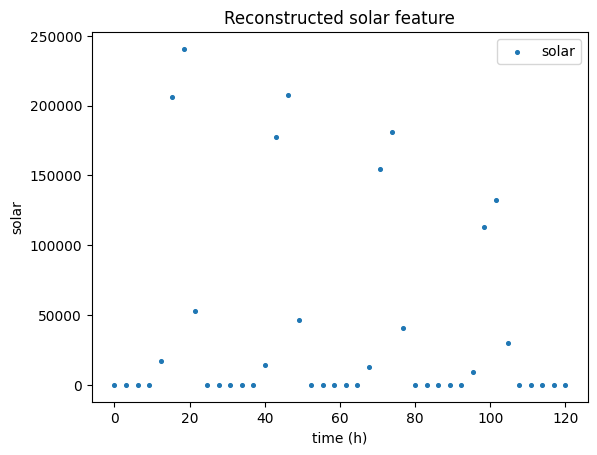

,start_time,original_datetime,year,month,day,hour,day_of_week,solar,solar_1d,solar_2d
start_time,,,,,,,,,,
2021-12-31 18:00:00,2021-12-31 18:00:00,2021-12-31 18:00:00+00:00,2021,12,31,18,Friday,0.000000,0.000000,0.000000
2021-12-31 21:00:00,2021-12-31 21:00:00,2021-12-31 18:00:00+00:00,2021,12,31,21,Friday,0.000000,0.000000,0.000000
2022-01-01 00:00:00,2022-01-01 00:00:00,2021-12-31 18:00:00+00:00,2022,1,1,0,Saturday,0.000000,0.000000,0.000000
2022-01-01 03:00:00,2022-01-01 03:00:00,2021-12-31 18:00:00+00:00,2022,1,1,3,Saturday,0.000000,0.000000,0.000000
2022-01-01 06:00:00,2022-01-01 06:00:00,2022-01-01 06:00:00+00:00,2022,1,1,6,Saturday,16900.948502,16900.948502,16900.948502
...,...,...,...,...,...,...,...,...,...,...
2025-01-25 06:00:00,2025-01-25 06:00:00,2025-01-25 06:00:00+00:00,2025,1,25,6,Saturday,18511.793876,18511.793876,18511.793876
2025-01-25 09:00:00,2025-01-25 09:00:00,2025-01-25 06:00:00+00:00,2025,1,25,9,Saturday,162435.472459,143923.678583,125411.884707
2025-01-25 12:00:00,2025-01-25 12:00:00,2025-01-25 06:00:00+00:00,2025,1,25,12,Saturday,195319.559698,32884.087239,-111039.591344


In [10]:
sel_solar = new_solar
sel_solar['solar'] = sel_solar['E_3h']
sel_solar = sel_solar.drop(columns = 'E_3h')

# computing the first derivative
sel_solar['solar_1d'] = sel_solar.loc[:,'solar'].diff()
# computing the second derivative
sel_solar['solar_2d'] = sel_solar.loc[:,'solar_1d'].diff()

# set NA values to 0 (.diff() leaves out first values)
sel_solar.loc[sel_solar.index[0], 'solar_1d'] = 0
sel_solar.loc[sel_solar.index[0], 'solar_2d'] = 0
sel_solar.loc[sel_solar.index[1], 'solar_2d'] = 0

plot_s = sel_solar['solar'][:40]

# defining a growing time parameter (for easy plot purposes)
time = np.linspace(0, len(plot_s)*3, len(plot_s))

# plot the data to check if there is a reasonable trend (no clear outliers)
plt.scatter(time, plot_s, s =7, label ='solar')
#plt.scatter(time, sel_solar['solar_1d'], label ='1 derivative', s = 0.5)
plt.xlabel('time (h)')
plt.ylabel('solar')
plt.title('Reconstructed solar feature')
plt.legend()
plt.show()

sel_solar

## Reconstructing tp feature
Since rainy precipitations do not have an expected schema during the hours of a day, the best model we can implement is a simple division of the real data over the desired timestamps. By doing so we ensure that the total data is equal to the real data that we have

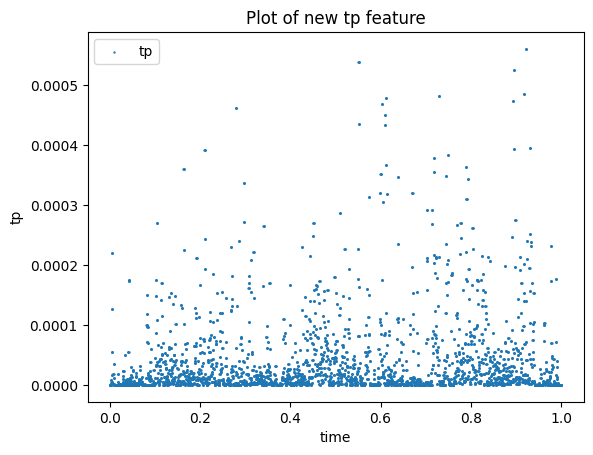

0.8057455540355677

In [11]:
# ensure the df is sorted by datetime
sel_tp.index = pd.to_datetime(sel_tp.index)
sel_tp = sel_tp.sort_index()

# create a new list to hold expanded rows
expanded_rows = []

# iterate over each row in the DataFrame
for timestamp, row in sel_tp.iterrows():
    for i in range(4):
        new_time = timestamp + pd.Timedelta(hours=3 * i)
        original_datetime = timestamp
        new_row = row['tp'] / 4  # divide all values in the row by 4
        expanded_rows.append((new_time,original_datetime, new_row))

# convert to a new DataFrame
new_tp = pd.DataFrame(
    [(r[2],r[1]) for r in expanded_rows],  # this is the tp value (divided by 4)
    index=[r[0] for r in expanded_rows],
    columns=['tp','original_datetime']
)


new_tp.rename(columns={0: 'tp'}, inplace=True)
new_tp['start_time'] = new_tp.index
new_tp['year'] = pd.to_datetime(new_tp.index).year
new_tp['month'] = pd.to_datetime(new_tp.index).month
new_tp['day'] = pd.to_datetime(new_tp.index).day
new_tp['hour'] = pd.to_datetime(new_tp.index).hour
new_tp['day_of_week'] = pd.to_datetime(new_tp.index).day_name()

new_tp = new_tp[['start_time','original_datetime','tp','year','month','day','hour','day_of_week']]
# plot the data to check if there is a reasonable trend (no clear outliers)
time = np.linspace(0, 1, len(new_tp['tp']))

plt.scatter(time, new_tp['tp'], s = 0.5, label ='tp')
#plt.scatter(time, sel_solar['solar_1d'], label ='1 derivative', s = 0.5)
plt.xlabel('time')
plt.ylabel('tp')
plt.title('Plot of new tp feature')
plt.legend()
plt.show()

len(np.where(new_tp['tp'] <= max(new_tp['tp'])/10)[0]) / len(new_tp['tp'])


# Merging it all together
Here we merge all the dataframes that were separated until now

In [41]:
from functools import reduce
import calendar

# returns the number of days in a given month of a given year
def days_in_month(row):
    return calendar.monthrange(row['year'], row['month'])[1]

# merge the dataframes on common indices
all_df = [sel_2t, new_tp, new_solar, sel_ws10, sel_ws100]
df = reduce(lambda left, right: pd.merge(left,right, on = ['year','month','day','hour','day_of_week'], how= 'inner'), all_df)

# let's use the function to correctly assign the total number of days to each record
df['days_in_month'] = df.apply(days_in_month, axis=1)

# recreate date time format
df['timestamp'] = pd.to_datetime({
    'year': df['year'],
    'month': df['month'],
    'day': df['day'],
    'hour': df['hour']
})

# rearrange columns
df = df[['timestamp','year','month','day','hour','2t','solar','tp','ws_10m','ws_100m','days_in_month']]

# keep only 2022, 2023, 2024
years = [2022, 2023, 2024]
df = df[df['year'].isin(years)]

# redefine cyclic time (using sin, cos)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / df['days_in_month'])  # Assume max 31 days
df['day_cos'] = np.cos(2 * np.pi * df['day'] / df['days_in_month'])

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Detect leap year
year = df['year']
day_of_year = df['timestamp'].dt.dayofyear
is_leap_year = ((year % 4 == 0) & ((year % 100 != 0) | (year % 400 == 0)))

# Compute the number of days in the year dynamically
days_in_year = np.where(is_leap_year, 366, 365)

# Now compute angle using correct denominator
angle = 2 * np.pi * (day_of_year / days_in_year)

df['sin_dayofyear'] = np.sin(angle)
df['cos_dayofyear'] = np.cos(angle)

# remove not needed
df = df.drop(columns = ['timestamp','days_in_month','month','day','hour'])
df


,year,2t,solar,tp,ws_10m,ws_100m,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,sin_dayofyear,cos_dayofyear
0,2022,275.784985,0.000000,4.289357e-07,1.866247,2.788379,0.000000e+00,1.000000e+00,2.012985e-01,0.97953,5.000000e-01,0.866025,1.721336e-02,0.999852
1,2022,275.289201,0.000000,4.289357e-07,1.868403,2.541100,7.071068e-01,7.071068e-01,2.012985e-01,0.97953,5.000000e-01,0.866025,1.721336e-02,0.999852
2,2022,274.958228,16900.948502,2.432269e-07,1.829957,2.442400,1.000000e+00,6.123234e-17,2.012985e-01,0.97953,5.000000e-01,0.866025,1.721336e-02,0.999852
3,2022,277.285909,206381.447532,2.432269e-07,1.697000,1.985010,7.071068e-01,-7.071068e-01,2.012985e-01,0.97953,5.000000e-01,0.866025,1.721336e-02,0.999852
4,2022,282.379178,240626.243224,2.432269e-07,1.456283,1.531676,1.224647e-16,-1.000000e+00,2.012985e-01,0.97953,5.000000e-01,0.866025,1.721336e-02,0.999852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,2024,282.196506,248061.426998,7.044598e-08,0.917655,0.948773,1.224647e-16,-1.000000e+00,-2.449294e-16,1.00000,-2.449294e-16,1.000000,-2.449294e-16,1.000000
8324,2024,281.768781,54207.000178,7.044598e-08,1.060584,1.085007,-7.071068e-01,-7.071068e-01,-2.449294e-16,1.00000,-2.449294e-16,1.000000,-2.449294e-16,1.000000
8325,2024,275.946875,0.000000,1.130039e-07,1.021991,1.031373,-1.000000e+00,-1.836970e-16,-2.449294e-16,1.00000,-2.449294e-16,1.000000,-2.449294e-16,1.000000
8326,2024,275.946875,0.000000,1.130039e-07,1.021991,1.031373,-1.000000e+00,-1.836970e-16,-2.449294e-16,1.00000,-2.449294e-16,1.000000,-2.449294e-16,1.000000


# Duplicating rows (sliding windows)
Our aim here is to associate each record to the next 8, such that each data point is connected to the points within the latter 24h. This is done to incentivate correlation seeking in the VAE.

In [42]:

steps = 9 # 1st step is current time step, 8*3 = 24 means that giving the next 8 we give one more full day
columns = df.columns

# holder list
expanded_data = []

# row by row collect data, stop after 9
for i in range(len(df) - (steps - 1)):
    # Collect the next 9 rows
    window = df.iloc[i:i+steps].values.flatten()
    expanded_data.append(window)

# get column names
new_column_names = []
for step in range(steps):
    for col in columns:
        new_column_names.append(f"{col}_t{step}")

df_expanded = pd.DataFrame(expanded_data, columns=new_column_names)

# set the true timestamp as index
df_expanded['timestamp'] = df.index[:len(df_expanded)]
df_expanded.set_index('timestamp', inplace=True)
df_expanded


,year_t0,2t_t0,solar_t0,tp_t0,ws_10m_t0,ws_100m_t0,hour_sin_t0,hour_cos_t0,day_sin_t0,day_cos_t0,...,ws_10m_t8,ws_100m_t8,hour_sin_t8,hour_cos_t8,day_sin_t8,day_cos_t8,month_sin_t8,month_cos_t8,sin_dayofyear_t8,cos_dayofyear_t8
timestamp,,,,,,,,,,,,,,,,,,,,,
0,2022.0,275.784985,0.000000,4.289357e-07,1.866247,2.788379,0.000000e+00,1.000000e+00,2.012985e-01,0.97953,...,1.259979,1.353322,-7.071068e-01,7.071068e-01,2.012985e-01,0.979530,5.000000e-01,0.866025,1.721336e-02,0.999852
1,2022.0,275.289201,0.000000,4.289357e-07,1.868403,2.541100,7.071068e-01,7.071068e-01,2.012985e-01,0.97953,...,1.401813,1.563625,0.000000e+00,1.000000e+00,3.943559e-01,0.918958,5.000000e-01,0.866025,3.442161e-02,0.999407
2,2022.0,274.958228,16900.948502,2.432269e-07,1.829957,2.442400,1.000000e+00,6.123234e-17,2.012985e-01,0.97953,...,1.463438,1.723514,7.071068e-01,7.071068e-01,3.943559e-01,0.918958,5.000000e-01,0.866025,3.442161e-02,0.999407
3,2022.0,277.285909,206381.447532,2.432269e-07,1.697000,1.985010,7.071068e-01,-7.071068e-01,2.012985e-01,0.97953,...,1.532591,1.842750,1.000000e+00,6.123234e-17,3.943559e-01,0.918958,5.000000e-01,0.866025,3.442161e-02,0.999407
4,2022.0,282.379178,240626.243224,2.432269e-07,1.456283,1.531676,1.224647e-16,-1.000000e+00,2.012985e-01,0.97953,...,1.564509,2.064700,7.071068e-01,-7.071068e-01,3.943559e-01,0.918958,5.000000e-01,0.866025,3.442161e-02,0.999407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,2024.0,282.751056,55436.208682,1.215681e-08,1.082836,1.065131,-7.071068e-01,-7.071068e-01,-2.012985e-01,0.97953,...,0.917655,0.948773,1.224647e-16,-1.000000e+00,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000
8316,2024.0,277.124507,0.000000,5.733658e-08,1.154160,0.917162,-1.000000e+00,-1.836970e-16,-2.012985e-01,0.97953,...,1.060584,1.085007,-7.071068e-01,-7.071068e-01,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000
8317,2024.0,277.124507,0.000000,5.733658e-08,1.154160,0.917162,-1.000000e+00,-1.836970e-16,-2.012985e-01,0.97953,...,1.021991,1.031373,-1.000000e+00,-1.836970e-16,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000


# Normalization of features

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_expanded), columns=df_expanded.columns, index=df_expanded.index)
df_scaled

,year_t0,2t_t0,solar_t0,tp_t0,ws_10m_t0,ws_100m_t0,hour_sin_t0,hour_cos_t0,day_sin_t0,day_cos_t0,...,ws_10m_t8,ws_100m_t8,hour_sin_t8,hour_cos_t8,day_sin_t8,day_cos_t8,month_sin_t8,month_cos_t8,sin_dayofyear_t8,cos_dayofyear_t8
timestamp,,,,,,,,,,,,,,,,,,,,,
0,-1.224855,-1.266622,-0.785197,-0.540314,-0.169929,0.237315,0.249009,1.890047,0.280164,1.400589,...,-0.982129,-1.132097,-0.685682,1.408711,0.280448,1.400505,0.702453,1.109234,0.025586,1.291842
1,-1.224855,-1.324489,-0.785197,-0.540314,-0.167036,0.001132,1.183829,1.408519,0.280164,1.400589,...,-0.791966,-0.931334,0.249115,1.890286,0.552704,1.314595,0.702453,1.109234,0.050415,1.291222
2,-1.224855,-1.363120,-0.691746,-0.543042,-0.218606,-0.093139,1.571044,0.246007,0.280164,1.400589,...,-0.709343,-0.778698,1.183912,1.408711,0.552704,1.314595,0.702453,1.109234,0.050415,1.291222
3,-1.224855,-1.091436,0.355950,-0.543042,-0.396948,-0.530006,1.183829,-0.916506,0.280164,1.400589,...,-0.616626,-0.664870,1.571118,0.246088,0.552704,1.314595,0.702453,1.109234,0.050415,1.291222
4,-1.224855,-0.496955,0.545301,-0.543042,-0.719834,-0.962998,0.249009,-1.398034,0.280164,1.400589,...,-0.573833,-0.452988,1.183912,-0.916535,0.552704,1.314595,0.702453,1.109234,0.050415,1.291222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,1.224561,-0.453550,-0.478673,-0.546437,-1.220757,-1.408609,-0.685811,-0.916506,-0.287572,1.400589,...,-1.441098,-1.518295,0.249115,-1.398110,-0.003431,1.429539,-0.019310,1.295919,0.000749,1.292048
8316,1.224561,-1.110274,-0.785197,-0.545773,-1.125086,-1.549938,-1.073026,0.246007,-0.287572,1.400589,...,-1.249467,-1.388240,-0.685682,-0.916535,-0.003431,1.429539,-0.019310,1.295919,0.000749,1.292048
8317,1.224561,-1.110274,-0.785197,-0.545773,-1.125086,-1.549938,-1.073026,0.246007,-0.287572,1.400589,...,-1.301211,-1.439442,-1.072887,0.246088,-0.003431,1.429539,-0.019310,1.295919,0.000749,1.292048


In [44]:
df_scaled.to_csv(f"output/{sel_zone}_VAE_input.csv")